In [46]:
import pandas as pd
import numpy as np

Q1 :  read dataset

In [47]:
# Q1
df = pd.read_csv("/media/amin/Docs/Doc/Learn/ML Bootcamp/Data analysis/exercise/HW9/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Q2 : find out shape of data.

In [48]:
# Q2
df.shape

(344, 7)

Q2 => It returns a tupple : (Num of rows, Num of columns)

Q3 : dataset info.

In [49]:
# Q3
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Q3 => The summary of dataset includes columns, data types and the number of non-null values in each column.

Q4 :  unique Species

In [50]:
# Q4
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

Q4 => It returns an array contains three unique species.

Q5 :  find NaN values per columns

In [51]:
# Q5
df.isna() # returns a table with a True val in the place of NaN val.
df.isna().sum() # returns sum of NaN val in each column.
df.isna().any() # is ther any NaN val in df.
df[["species", "culmen_length_mm"]].isna().sum() # return sum of NaN valuse per columns.
df["species"].isna() # return NaN valuse per column.
df["species"].isna().sum() # return sum of NaN valuse in selected column.
df[df.isna().any(axis=1)] # return rows with NaN valuse in columns.


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


Q5 => Some info about null values id df.

Q6 : find culmen_depth_mm in each island

In [52]:
# Q6
df.dropna(inplace=True)
df.groupby("island").agg({"culmen_depth_mm":"mean"})

,culmen_depth_mm
island,
Biscoe,15.906098
Dream,18.339837
Torgersen,18.451064


Q6 => Befor that we should deal with NaN values in df. Because we have just two rows of NaN valuses and all columns of thoes are fulled with NaN, so I think we should drop them. On the other side, other NaN valuses are in the "sex" column that we can't fill them with sth like mean or etc, so I think they should be dropped. (We can fii them with sth like decision tree, but at this time no). 
It rturns mean of culmen depth in each island.

Q7 :  body mass in each sex

In [53]:
# Q7
sex_index = df[df['sex'] == '.'].index # Find index of mal "sex" valuse. 
df.drop(sex_index, inplace=True)
df.groupby("sex").agg(body_mess_mean = ("body_mass_g", "mean")).round(2)

,body_mess_mean
sex,
FEMALE,3862.27
MALE,4545.68


Q7 => We have a row with "sex" val of ".". We sould delete it to have a meaningfull "sex" type.(Ofcorce same as previous question we could fill it by decision tree). It rturns mean of body mess based on gender type.

Q8 : species in each island

In [54]:
# Q8
pd.DataFrame(df.groupby("species").agg("island").unique()) # which species exist in which island
# df.groupby(["species","island"]).agg(number_of_species=("species","count")) # if we want their numbers

,island
species,
Adelie,"[Torgersen, Biscoe, Dream]"
Chinstrap,[Dream]
Gentoo,[Biscoe]


Q8 => It retuens a data frame, species as rows and island as column. If we want to know which species exist in which island, but if we want to know the count of species in each island, we should use second line of code(the comment one).

Q9 : share of female penguins in each species

In [55]:
# Q9
df2 = df.loc[df["sex"] == "FEMALE", ["species","sex"]] # select just female of all species
df2 = df2.groupby("species").agg(FEMALE_count = ("sex","count")) # grouping females of each species(count them)
arr = df["species"].value_counts(sort=False) # total num of each species, both M and F.
df2["FEMALE_percentage"] = np.multiply(np.divide(df2["FEMALE_count"], arr), 100).round(2) # add a percentage column.
df2

,FEMALE_count,FEMALE_percentage
species,,
Adelie,73,50.00
Chinstrap,34,50.00
Gentoo,58,48.74


Q9 => It returns a data frame that contains number of female in each species and the percentage of them. Code description was came in front of the codes.

Q10 : flipper_length_mm comparisons between species ( min, max, mean)

In [56]:
# Q10
# df.groupby("species").agg({"flipper_length_mm":["min","max","mean"]}) # with groupby
df.pivot_table(values="flipper_length_mm", columns="species", aggfunc=["min", "max", "mean"])

min                     max                        mean  \
species           Adelie Chinstrap Gentoo Adelie Chinstrap Gentoo     Adelie   
flipper_length_mm  172.0     178.0  203.0  210.0     212.0  231.0  190.10274   

                                           
species             Chinstrap      Gentoo  
flipper_length_mm  195.823529  217.235294

Q10 => I used pivot table(also I solved it by qroupby in first line). It returns some features of flipper length like min, max, etc, bacsed on species.

EXTRA Q1 : Is there any relation between mass of penguins and their flipper length?

In [37]:
# EXTRA Q1
df[["body_mass_g","flipper_length_mm"]].corr()

,body_mass_g,flipper_length_mm
body_mass_g,1.000000,0.872979
flipper_length_mm,0.872979,1.000000


EXTRA Q1 => By measering correlation we can find it. As we can see there is a meaning full relation between them: "A big head has a big ache".

EXTRA Q2 : Draw box-plot for body mess based on species and sex.

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

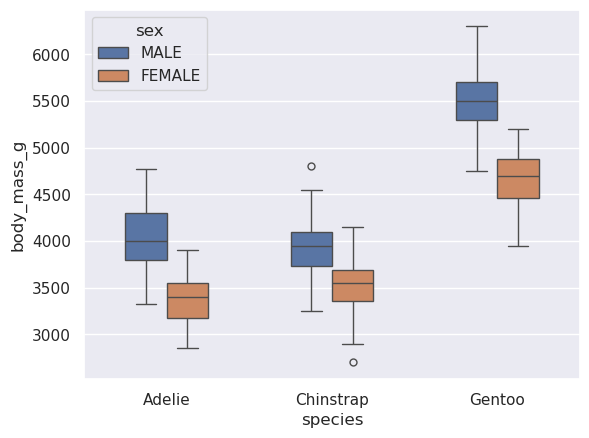

In [57]:
# EXTRA Q2
import seaborn as sns
sns.set()
sns.boxplot(x = "species", y = "body_mass_g",hue="sex", data=df, width=0.5,fliersize=5)

EXTRA Q2 => It returns a box-plot diagram that we can get some useful info from it, like quantiles etc. One thing that is obvious: the mass average for females is lower than male.

EXTRA Q3 : How many penguins of each species are in each island.

In [58]:
# EXTRA Q3
df.groupby(["species","island"]).agg(number_of_species=("species","count"))

number_of_species
species   island                      
Adelie    Biscoe                    44
          Dream                     55
          Torgersen                 47
Chinstrap Dream                     68
Gentoo    Biscoe                   119

EXTRA Q3 => Based on species	and island, it returns count of penguins.

EXTRA Q4 : Count number of female and male penguins in each island.

In [39]:
# EXTRA Q4
df.pivot_table("species",index=["island","sex"], aggfunc="count")

species
island    sex            
Biscoe    FEMALE       80
          MALE         83
Dream     FEMALE       61
          MALE         62
Torgersen FEMALE       24
          MALE         23

EXTRA Q4 => It returns a data frame, number of penguins in each island based on their gender.

EXTRA Q5 : Is there any relation between gender and mass?

In [44]:
df1 = df.copy()
df1["sex"].replace(["MALE","FEMALE"], [1,0], inplace=True)
df1[["sex","body_mass_g"]].corr()
# df1

,sex,body_mass_g
sex,1.000000,0.424987
body_mass_g,0.424987,1.000000


EXTRA Q5 => As we saw in box plot diagram, average mass of females are lower. To show that with correlation function, we need numerical series, so we did it by replacind "F" and "M" by [0,1]. We see that the correlation is positive so gender and mass have a direct relation.